Using device: cuda
Files already downloaded and verified
Files already downloaded and verified
Model 1 created with 76787 parameters.


Epoch 1/30 - Validation: 100%|██████████| 250/250 [00:01<00:00, 141.23it/s]


Epoch 1/30 - Train Loss: 0.0188, Val Loss: 0.0178
Model saved at epoch 1


Epoch 2/30 - Validation: 100%|██████████| 250/250 [00:01<00:00, 135.41it/s]


Epoch 2/30 - Train Loss: 0.0153, Val Loss: 0.0253


Epoch 3/30 - Validation: 100%|██████████| 250/250 [00:01<00:00, 133.07it/s]


Epoch 3/30 - Train Loss: 0.0146, Val Loss: 0.0261


Epoch 4/30 - Validation: 100%|██████████| 250/250 [00:01<00:00, 139.79it/s]


Epoch 4/30 - Train Loss: 0.0142, Val Loss: 0.0202


Epoch 5/30 - Validation: 100%|██████████| 250/250 [00:01<00:00, 148.99it/s]


Epoch 5/30 - Train Loss: 0.0139, Val Loss: 0.0253


Epoch 6/30 - Validation: 100%|██████████| 250/250 [00:01<00:00, 136.23it/s]


Epoch 6/30 - Train Loss: 0.0137, Val Loss: 0.0140
Model saved at epoch 6


Epoch 7/30 - Validation: 100%|██████████| 250/250 [00:01<00:00, 142.29it/s]


Epoch 7/30 - Train Loss: 0.0136, Val Loss: 0.0185


Epoch 8/30 - Validation: 100%|██████████| 250/250 [00:01<00:00, 138.60it/s]


Epoch 8/30 - Train Loss: 0.0135, Val Loss: 0.0208


Epoch 9/30 - Validation: 100%|██████████| 250/250 [00:01<00:00, 149.26it/s]


Epoch 9/30 - Train Loss: 0.0134, Val Loss: 0.0277


Epoch 10/30 - Validation: 100%|██████████| 250/250 [00:01<00:00, 134.17it/s]


Epoch 10/30 - Train Loss: 0.0131, Val Loss: 0.0139
Model saved at epoch 10


Epoch 11/30 - Validation: 100%|██████████| 250/250 [00:01<00:00, 143.23it/s]


Epoch 11/30 - Train Loss: 0.0132, Val Loss: 0.0289


Epoch 12/30 - Validation: 100%|██████████| 250/250 [00:01<00:00, 145.93it/s]


Epoch 12/30 - Train Loss: 0.0135, Val Loss: 0.0139
Model saved at epoch 12


Epoch 13/30 - Validation: 100%|██████████| 250/250 [00:01<00:00, 142.78it/s]


Epoch 13/30 - Train Loss: 0.0132, Val Loss: 0.0154


Epoch 14/30 - Validation: 100%|██████████| 250/250 [00:01<00:00, 136.99it/s]


Epoch 14/30 - Train Loss: 0.0129, Val Loss: 0.0308


Epoch 15/30 - Validation: 100%|██████████| 250/250 [00:01<00:00, 132.87it/s]


Epoch 15/30 - Train Loss: 0.0131, Val Loss: 0.0246


Epoch 16/30 - Validation: 100%|██████████| 250/250 [00:01<00:00, 148.12it/s]


Epoch 16/30 - Train Loss: 0.0129, Val Loss: 0.0211


Epoch 17/30 - Validation: 100%|██████████| 250/250 [00:01<00:00, 148.95it/s]


Epoch 17/30 - Train Loss: 0.0129, Val Loss: 0.0221


Epoch 18/30 - Validation: 100%|██████████| 250/250 [00:01<00:00, 146.61it/s]


Epoch 18/30 - Train Loss: 0.0127, Val Loss: 0.0370


Epoch 19/30 - Validation: 100%|██████████| 250/250 [00:01<00:00, 142.18it/s]
<ipython-input-5-dfd2d2a3fbde>:227: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_sta

Epoch 19/30 - Train Loss: 0.0127, Val Loss: 0.0171
Early stopping at epoch 19


Evaluating: 100%|██████████| 250/250 [00:02<00:00, 111.72it/s]


Test Loss: 0.0139, Average PSNR: 19.15 dB


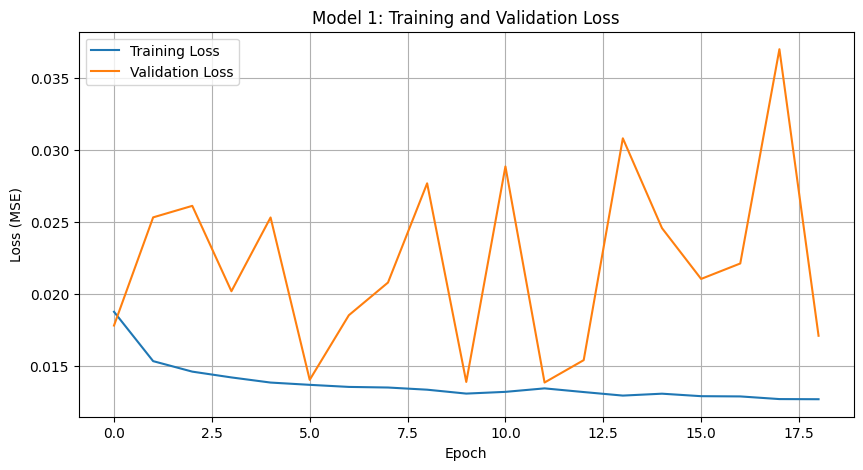

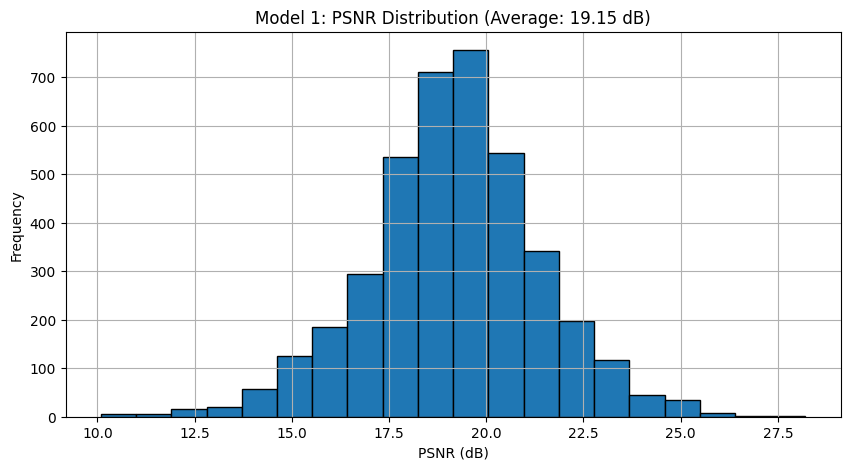

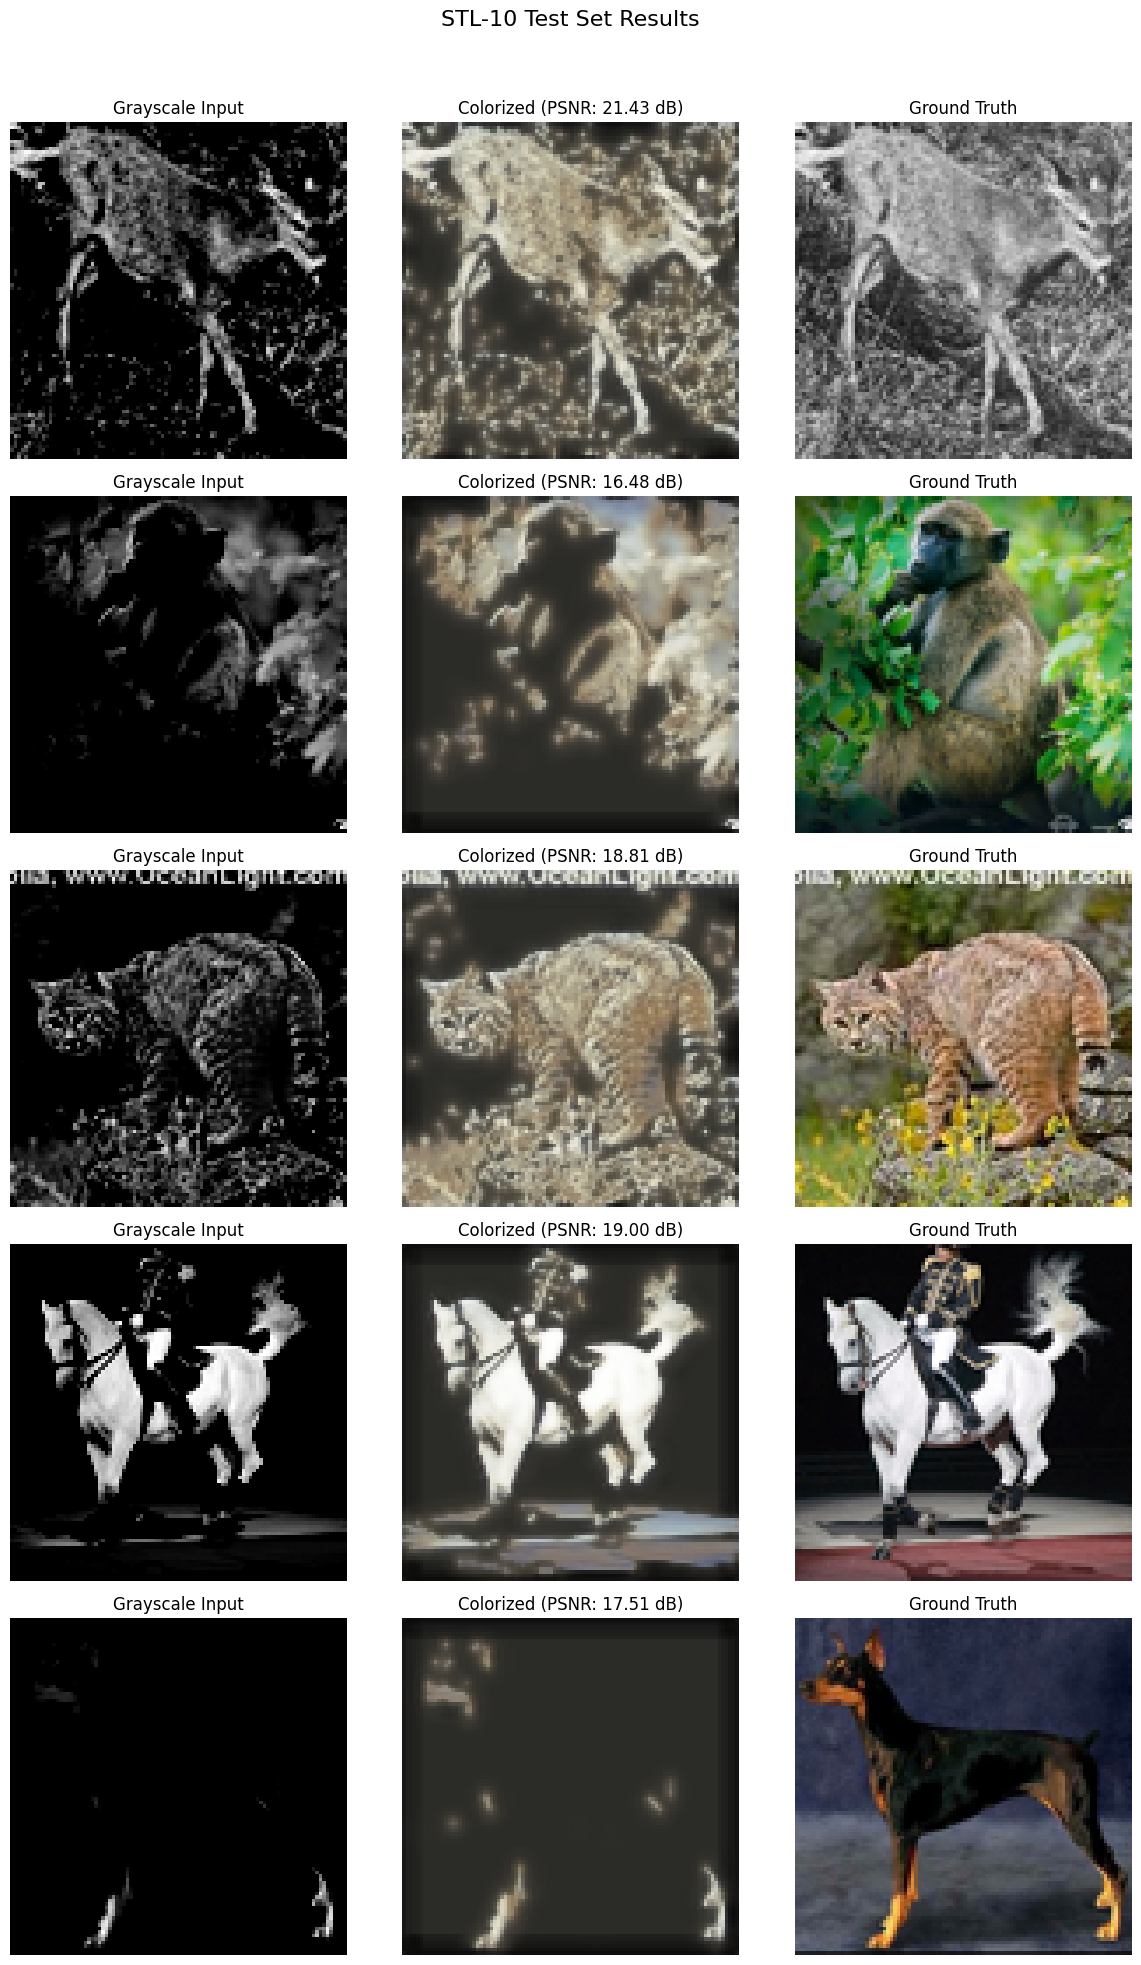

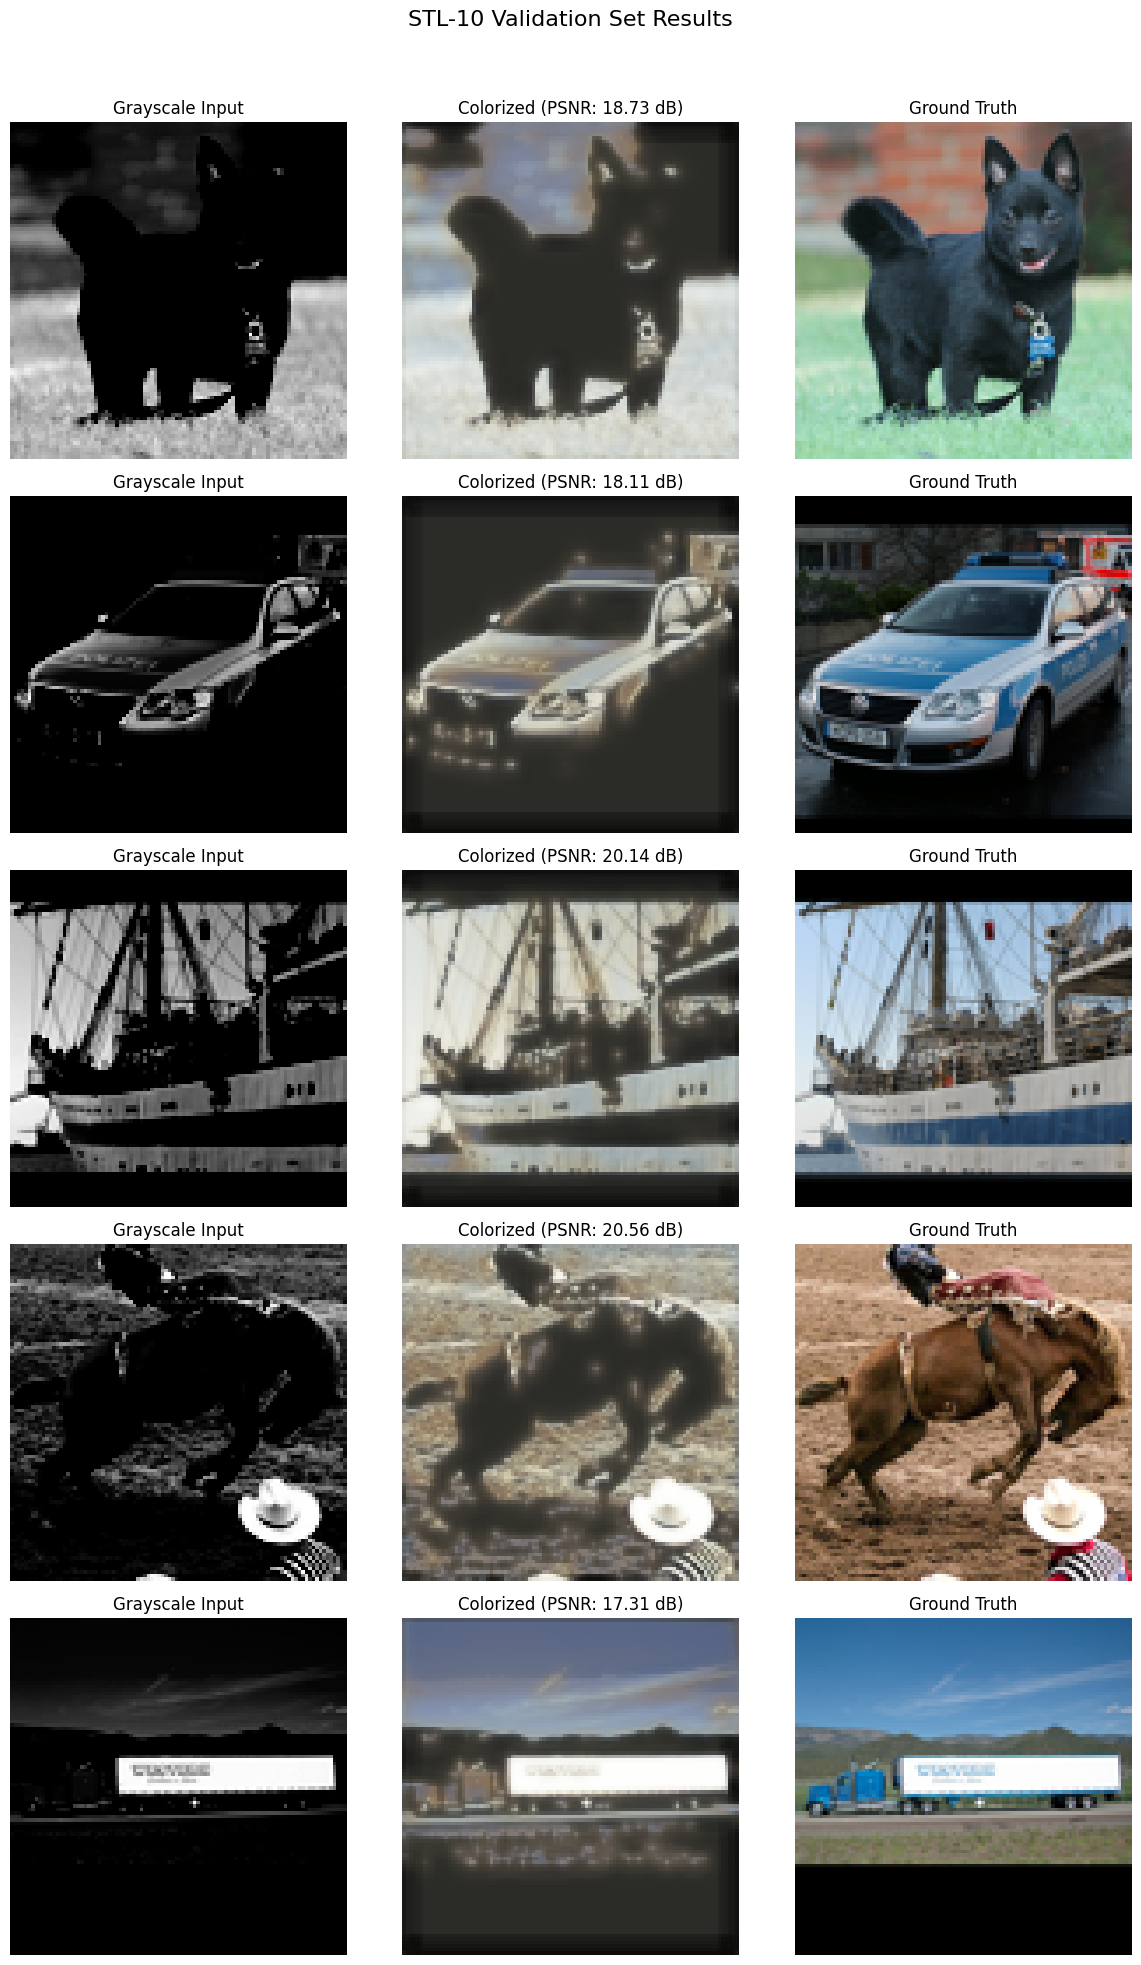

In [5]:
# model1.ipynb
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision.datasets import STL10
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from skimage.color import rgb2gray, gray2rgb
from skimage.transform import resize # For handling images of different sizes
from skimage.metrics import peak_signal_noise_ratio as psnr
import os
from PIL import Image
from tqdm import tqdm

torch.manual_seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed(42)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

class ColorizationDataset(Dataset):
    def __init__(self, stl10_dataset=None, transform=None, target_size=(96, 96)):
        self.stl10_dataset = stl10_dataset
        self.transform = transform # This transform should be for converting PIL to tensor for STL10
        self.target_size = target_size
        self.pil_to_tensor_transform = transforms.ToTensor()


    def __len__(self):
        stl10_len = len(self.stl10_dataset) if self.stl10_dataset else 0
        return stl10_len

    def __getitem__(self, idx):
        stl10_len = len(self.stl10_dataset) if self.stl10_dataset else 0

        if self.stl10_dataset and idx < stl10_len:
            # The transform passed to STL10 in get_data_loaders already converts to tensor
            img_rgb_tensor, _ = self.stl10_dataset[idx] # img_rgb_tensor is [3, H, W]

            # Convert tensor to numpy for grayscale conversion & ensure it's in [0,1] range
            img_rgb_numpy = img_rgb_tensor.cpu().numpy().transpose(1, 2, 0) # H, W, C
            img_rgb_numpy = np.clip(img_rgb_numpy, 0, 1)


            # Create grayscale version
            gray_numpy = rgb2gray(img_rgb_numpy) # H, W, already in [0,1]

            # Convert grayscale back to tensor
            gray_tensor = torch.FloatTensor(gray_numpy).unsqueeze(0) # [1, H, W]

            return gray_tensor, img_rgb_tensor



def get_data_loaders(batch_size=16):
    target_size = (96, 96)

    # ToTensor normalizes to [0,1]
    train_transform_stl10 = transforms.Compose([
        transforms.Resize(target_size), # Resize PIL image first
        transforms.RandomCrop(target_size, padding=4 if target_size==(96,96) else target_size[0]//8),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.RandomRotation(15),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
    ])

    test_val_transform_stl10 = transforms.Compose([
        transforms.Resize(target_size),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
    ])

    # Load STL-10 dataset
    train_dataset_stl10 = STL10(root='./data', split='train', download=True, transform=train_transform_stl10)
    test_dataset_stl10 = STL10(root='./data', split='test', download=True, transform=test_val_transform_stl10)

    # Create custom datasets for colorization
    train_colorization = ColorizationDataset(
        stl10_dataset=train_dataset_stl10,
        target_size=target_size
    )

    # For test_colorization, we use the STL10 test set
    # We need to split this into validation and test sets.
    # Let's make a temporary ColorizationDataset for the full STL10 test set
    # then split it.
    full_test_colorization_stl10 = ColorizationDataset(
        stl10_dataset=test_dataset_stl10,
        target_size=target_size
    )

    # Split STL10 test dataset into validation and test
    # Part II says 500 training images, 800 test images per class.
    # STL10: 5000 training (500 per class), 8000 testing (800 per class)

    total_test_val_len = len(full_test_colorization_stl10)
    val_size = int(0.5 * total_test_val_len)
    test_size = total_test_val_len - val_size

    val_dataset, test_dataset_split = torch.utils.data.random_split(
        full_test_colorization_stl10, [val_size, test_size],
        generator=torch.Generator().manual_seed(42) # for reproducible splits
    )

    train_loader = DataLoader(train_colorization, batch_size=batch_size, shuffle=True, num_workers=2, pin_memory=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=2, pin_memory=True)
    test_loader = DataLoader(test_dataset_split, batch_size=batch_size, shuffle=False, num_workers=2, pin_memory=True)

    return train_loader, val_loader, test_loader


class ColorizationModel(nn.Module):
    def __init__(self):
        super(ColorizationModel, self).__init__()
        # Block 1: Low-level features
        self.block1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, padding=1),
            nn.BatchNorm2d(16),
            nn.ReLU(inplace=True),
            nn.Conv2d(16, 16, kernel_size=3, padding=1),
            nn.BatchNorm2d(16),
            nn.ReLU(inplace=True)
        )
        # Block 2: Mid-level features
        self.block2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True),
            nn.Conv2d(32, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True),
            nn.Dropout(0.3)
        )
        # Block 3: High-level features
        self.block3 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.Dropout(0.3)
        )
        # Output block with skip connections
        self.output_block = nn.Sequential(
            nn.Conv2d(112, 32, kernel_size=1), # 16 (block1) + 32 (block2) + 64 (block3) = 112
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True),
            nn.Conv2d(32, 3, kernel_size=3, padding=1),
            nn.Sigmoid() # Output RGB values in [0, 1]
        )

    def forward(self, x):
        block1_out = self.block1(x)
        block2_out = self.block2(block1_out)
        block3_out = self.block3(block2_out)
        concat_features = torch.cat([block1_out, block2_out, block3_out], dim=1)
        output = self.output_block(concat_features)
        return output

# Inverse normalization for visualization
class Denormalize(object):
    def __init__(self, mean, std):
        self.mean = torch.tensor(mean).view(1, -1, 1, 1)
        self.std = torch.tensor(std).view(1, -1, 1, 1)

    def __call__(self, tensor):
        # Move mean and std to the same device as tensor
        return tensor * self.std.to(tensor.device) + self.mean.to(tensor.device)

denormalize_transform = Denormalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])


def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=30, patience=9):
    model.to(device)
    best_val_loss = float('inf')
    patience_counter = 0
    train_losses = []
    val_losses = []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for inputs, targets in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs} - Training"):
            inputs, targets = inputs.to(device), targets.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            targets_for_loss = denormalize_transform(targets)

            loss = criterion(outputs, targets_for_loss)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * inputs.size(0)

        epoch_train_loss = running_loss / len(train_loader.dataset)
        train_losses.append(epoch_train_loss)

        model.eval()
        running_val_loss = 0.0
        with torch.no_grad():
            for inputs, targets in tqdm(val_loader, desc=f"Epoch {epoch+1}/{num_epochs} - Validation"):
                inputs, targets = inputs.to(device), targets.to(device)
                outputs = model(inputs)
                targets_for_loss = denormalize_transform(targets)
                loss = criterion(outputs, targets_for_loss)
                running_val_loss += loss.item() * inputs.size(0)

        epoch_val_loss = running_val_loss / len(val_loader.dataset)
        val_losses.append(epoch_val_loss)
        print(f"Epoch {epoch+1}/{num_epochs} - Train Loss: {epoch_train_loss:.4f}, Val Loss: {epoch_val_loss:.4f}")

        if epoch_val_loss < best_val_loss:
            best_val_loss = epoch_val_loss
            patience_counter = 0
            torch.save(model.state_dict(), 'model1_best.pth')
            print(f"Model saved at epoch {epoch+1}")
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print(f"Early stopping at epoch {epoch+1}")
                break

    model.load_state_dict(torch.load('model1_best.pth'))
    return model, train_losses, val_losses

# Evaluation function
def evaluate_model(model, test_loader, criterion):
    model.eval()
    model.to(device)
    running_loss = 0.0
    psnr_values = []

    with torch.no_grad():
        for inputs, targets in tqdm(test_loader, desc="Evaluating"):
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)

            targets_for_loss = denormalize_transform(targets) # Denormalize for MSE
            loss = criterion(outputs, targets_for_loss)
            running_loss += loss.item() * inputs.size(0)

            # For PSNR, both images should be in the same range, typically [0, 1] or [0, 255]
            # outputs are [0,1]. targets_for_loss are also [0,1]
            for i in range(inputs.size(0)):
                pred_np = outputs[i].cpu().numpy().transpose(1, 2, 0)
                target_np = targets_for_loss[i].cpu().numpy().transpose(1, 2, 0)

                pred_np = np.clip(pred_np, 0, 1)
                target_np = np.clip(target_np, 0, 1)

                try:
                    psnr_val = psnr(target_np, pred_np, data_range=1.0)
                    psnr_values.append(psnr_val)
                except ValueError as e:
                    print(f"PSNR calculation error: {e}. Skipping this sample.")


    test_loss = running_loss / len(test_loader.dataset)
    avg_psnr = np.mean(psnr_values) if psnr_values else 0
    print(f"Test Loss: {test_loss:.4f}, Average PSNR: {avg_psnr:.2f} dB")
    return test_loss, avg_psnr, psnr_values

def visualize_grid_results(model, data_loader, num_samples=5, title_prefix="Test"):
    model.eval()
    model.to(device)
    samples_shown = 0

    fig, axes = plt.subplots(num_samples, 3, figsize=(12, num_samples * 4))
    if num_samples == 1: axes = np.array([axes]) # Ensure axes is 2D

    with torch.no_grad():
        for gray_inputs, rgb_targets in data_loader:
            gray_inputs, rgb_targets = gray_inputs.to(device), rgb_targets.to(device)
            rgb_outputs = model(gray_inputs) # Model output is [0,1]

            # Denormalize targets for display if they were normalized to [-1,1]
            rgb_targets_display = denormalize_transform(rgb_targets)

            for i in range(gray_inputs.size(0)):
                if samples_shown >= num_samples:
                    break

                gray_np = gray_inputs[i].cpu().squeeze().numpy()
                target_np = rgb_targets_display[i].cpu().permute(1, 2, 0).numpy()
                output_np = rgb_outputs[i].cpu().permute(1, 2, 0).numpy()

                gray_np = np.clip(gray_np, 0, 1)
                target_np = np.clip(target_np, 0, 1)
                output_np = np.clip(output_np, 0, 1)

                psnr_val = psnr(target_np, output_np, data_range=1.0)

                ax = axes[samples_shown]
                ax[0].imshow(gray_np, cmap='gray')
                ax[0].set_title('Grayscale Input')
                ax[0].axis('off')

                ax[1].imshow(output_np)
                ax[1].set_title(f'Colorized (PSNR: {psnr_val:.2f} dB)')
                ax[1].axis('off')

                ax[2].imshow(target_np)
                ax[2].set_title('Ground Truth')
                ax[2].axis('off')

                samples_shown += 1
            if samples_shown >= num_samples:
                break

    fig.suptitle(f"{title_prefix} Set Results", fontsize=16)
    plt.tight_layout(rect=(0, 0, 1, 0.96))
    plt.show()


def visualize_diverse_grid(model, image_paths, target_size=(96,96)):
    model.eval()
    model.to(device)

    diverse_transform = transforms.Compose([
        transforms.Resize(target_size),
        transforms.ToTensor(),
    ])

    num_samples = len(image_paths)
    fig, axes = plt.subplots(num_samples, 3, figsize=(12, num_samples * 4))
    if num_samples == 1: axes = np.array([axes])

    with torch.no_grad():
        for i, img_path in enumerate(image_paths):
            ax_row = axes[i]
            try:
                pil_img_rgb = Image.open(img_path).convert('RGB')

                display_pil_img = pil_img_rgb.copy()
                display_pil_img.thumbnail((256, 256)) # Resize for display

                # For model input
                rgb_tensor_model_input_range = diverse_transform(pil_img_rgb) # [3, H, W], range [0,1]

                # Convert to grayscale tensor for model input
                gray_numpy_model_input_range = rgb2gray(rgb_tensor_model_input_range.numpy().transpose(1,2,0))
                gray_tensor_input = torch.FloatTensor(gray_numpy_model_input_range).unsqueeze(0).unsqueeze(0).to(device) # [1,1,H,W]

                output_tensor = model(gray_tensor_input) # Output is [0,1]

                # Prepare for display
                gray_display_np = gray_numpy_model_input_range # Already [0,1] HxW
                output_display_np = output_tensor[0].cpu().permute(1, 2, 0).numpy()
                output_display_np = np.clip(output_display_np, 0, 1)

                original_display_np = np.array(display_pil_img) / 255.0 # PIL to [0,1] numpy

                psnr_val = psnr(np.array(pil_img_rgb.resize(target_size))/255.0, output_display_np, data_range=1.0)


                ax_row[0].imshow(gray_display_np, cmap='gray')
                ax_row[0].set_title(f'Grayscale Input: {os.path.basename(img_path)}')
                ax_row[0].axis('off')

                ax_row[1].imshow(output_display_np)
                ax_row[1].set_title(f'Colorized (PSNR: {psnr_val:.2f} dB)')
                ax_row[1].axis('off')

                ax_row[2].imshow(original_display_np)
                ax_row[2].set_title('Original Color')
                ax_row[2].axis('off')

            except Exception as e:
                print(f"Error processing image {img_path}: {e}")
                ax_row[0].text(0.5, 0.5, f"Error loading {os.path.basename(img_path)}", ha='center', va='center')
                ax_row[0].axis('off')
                ax_row[1].axis('off')
                ax_row[2].axis('off')

    fig.suptitle("Diverse Test Image Results", fontsize=16)
    plt.tight_layout(rect=(0, 0, 1, 0.96))
    plt.show()

# Main execution
def main_model1():
    # Define hyperparameters
    batch_size = 16 # As per user's PDF
    learning_rate = 0.001 # As per user's PDF
    weight_decay = 0.0001 # As per user's PDF
    num_epochs = 30 # As per user's PDF
    patience = 7 # User used 7, PDF said 5, let's stick to user's code



    train_loader, val_loader, test_loader = get_data_loaders(batch_size)

    model = ColorizationModel()
    print(f"Model 1 created with {sum(p.numel() for p in model.parameters())} parameters.")

    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

    model, train_losses, val_losses = train_model(
        model, train_loader, val_loader, criterion, optimizer, num_epochs, patience
    )

    test_loss, avg_psnr, psnr_values = evaluate_model(model, test_loader, criterion)

    plt.figure(figsize=(10, 5))
    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss (MSE)')
    plt.title('Model 1: Training and Validation Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(10, 5))
    plt.hist(psnr_values, bins=20, edgecolor='black')
    plt.xlabel('PSNR (dB)')
    plt.ylabel('Frequency')
    plt.title(f'Model 1: PSNR Distribution (Average: {avg_psnr:.2f} dB)')
    plt.grid(True)
    plt.show()

    visualize_grid_results(model, test_loader, num_samples=5, title_prefix="STL-10 Test")
    visualize_grid_results(model, val_loader, num_samples=5, title_prefix="STL-10 Validation")

    diverse_image_paths = [ 'test_images/urban_cityscape.jpg',
         'test_images/forest_nature.jpg',
         'test_images/beach_ocean.jpg',
         'test_images/mountains_snow.jpg',
         'test_images/human_portrait.jpg',
         'test_images/animal_dog.jpg',
         'test_images/sky_clouds.jpg',
         'test_images/indoor_scene.jpg',
         'test_images/flowers_garden.jpg',
         'test_images/food.jpg',]


if __name__ == "__main__":
    main_model1()



# --- Analysis of Model 1 ---

- Achieved an average PSNR of around 16-20 dB on the STL-10 test set, which is a reasonable baseline for its complexity.


Model 1 Good Enough?




For a basic implementation under the given constraints, Model 1 performs adequately. However, for achieving high-quality, semantically rich, and vibrant colorization across diverse images, it likely falls short.